# Exploratory Data Analysis

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Load the data
df = pd.read_csv('data/declarations-exterminations-punaises-de-lit-2.csv')
#df['date'] = pd.to_datetime(df['date'])
#df

df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])

df['DATE_FIRST_EXT'] = df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'].dt.date)
df['DATE_FIRST_EXT']

0        2012-09-21
1        2011-07-27
2        2011-11-07
3        2011-08-09
4        2011-10-05
5        2012-11-08
6        2011-07-05
7        2012-03-18
8        2012-10-30
9        2011-08-03
10       2012-10-05
11       2012-10-17
12       2012-01-24
13       2011-09-27
14       2011-10-31
15       2012-03-28
16       2012-04-17
17       2011-07-11
18       2012-02-27
19       2012-05-08
20       2011-07-23
21       2012-07-05
22       2012-04-02
23       2012-07-23
24       2012-01-13
25       2012-07-09
26       2012-01-20
27       2012-04-25
28       2012-04-26
29       2011-08-31
            ...    
33335    2018-05-16
33336    2018-11-23
33337    2012-07-31
33338    2011-11-11
33339    2012-08-24
33340    2012-05-23
33341    2012-05-10
33342    2014-03-04
33343    2013-09-19
33344    2013-08-20
33345    2013-02-13
33346    2013-03-29
33347    2013-04-10
33348    2014-04-09
33349    2014-07-23
33350    2013-12-09
33351    2014-01-28
33352    2013-11-19
33353    2014-06-09


In [39]:
# Load the data
df = pd.read_csv('data/declarations-exterminations-punaises-de-lit-2.csv')
#df['date'] = pd.to_datetime(df['date'])
#df

df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])

# Create difference between Declaration and Inspection
df['DATE_DIFF'] = round((df['DATE_DECLARATION'] - df['DATE_PRIOR_INSP'])/np.timedelta64(1,'D'))
df['DATE_DIFF'].fillna(0, inplace=True)

# Create a column extracting month
df['DEC_MONTH'] = pd.DatetimeIndex(df['DATE_DECLARATION']).month

# Create Declared Incidents column for regression purposes
df['DEC_ISSUE'] = 1

# Populate blank values in EXT_FREQ 
df['EXT_FREQ'].fillna(1, inplace=True)

# Concatenate MTM8_X and MTM8_Y
#https://stackoverflow.com/questions/42520266/concatenating-two-floats-into-one-column-in-pandas
df['MTMXY'] = [', '.join(str(x) for x in y) for y in map(tuple, df[['MTM8_X', 'MTM8_Y']].values)]

df['LONLAT'] = [', '.join(str(x) for x in y) for y in map(tuple, df[['LONGITUDE', 'LATITUDE']].values)]


################################################
# Last section to work on.  Then can proceed to generate regression or whatever else you would like to do.

# Populate blanks with DATE_DECLARATION date and not time
# Cannot get the Nans to be replaced with Date without the time
df['DATE_FIRST_EXT'].replace(np.nan, df['DATE_DECLARATION'].dt.date)


#df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'].dt.date)

#print('here ' + str(df['DATE_DECLARATION'].dt.date))
#print(df['DATE_DECLARATION'].dt.date)

# Not replacing the NAN fields
#df['DATE_FIRST_EXT'].fillna(pd.to_datetime(df['DATE_DECLARATION']).date(), inplace=True)

#df['DATE_FIRST_EXT'].fillna(df['DATE_DECLARATION'], inplace=True)
#pd.to_datetime(df['DATE_DECLARATION']).date()
#df['DATE_FIRST_EXT'].fillna(pd.to_datetime(df['DATE_DECLARATION']).date(), inplace=True)
#print(pd.to_datetime(df['DATE_DECLARATION']).date())
#pd.DatetimeIndex(df['DATE_DECLARATION']).year + '-' + pd.DatetimeIndex(df['DATE_DECLARATION']).month + '-' + pd.DatetimeIndex(df['DATE_DECLARATION']).day


print(df['DATE_DIFF'])
#print(df['DATE_FIRST_EXT'])



# To be populated by the difference of the 2 fields afterwhich we can perform regression testing
# on fields DATE_DEC_FIRST, DECLARED, DATE_DIFF, EXT_FREQ
#df['DATE_DEC_FIRST'] = round((df['DATE_DECLARATION'] - df['DATE_FIRST_EXT'])/np.timedelta64(1,'D'))
####################################################



print(df.dtypes)
# Check for null values
print(df.isnull().sum())

#print(df.shape)

print('Bed Bugs')
print(df.columns)
print(df.head())
print(df.describe())

print(df['BORO_NAME'].value_counts())
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

print('Corr:',df.corr())


0        38.00
1        65.00
2         7.00
3         1.00
4        40.00
5        30.00
6         4.00
7         3.00
8         6.00
9         1.00
10       24.00
11        2.00
12        1.00
13        4.00
14       38.00
15        6.00
16       31.00
17        1.00
18        2.00
19        4.00
20       21.00
21        2.00
22        2.00
23        1.00
24        2.00
25       39.00
26       26.00
27        1.00
28        5.00
29        2.00
         ...  
33335    73.00
33336     6.00
33337     4.00
33338    41.00
33339   104.00
33340    10.00
33341     2.00
33342     7.00
33343     5.00
33344     4.00
33345     5.00
33346     7.00
33347    20.00
33348     5.00
33349    49.00
33350     8.00
33351    24.00
33352    32.00
33353     1.00
33354    26.00
33355     4.00
33356    13.00
33357    13.00
33358     6.00
33359     3.00
33360    10.00
33361    21.00
33362    13.00
33363     6.00
33364     4.00
Name: DATE_DIFF, Length: 33365, dtype: float64
NO_DECLARATION               int64
DAT

In [21]:
df_count = pd.DataFrame(df['BORO_NAME'].value_counts()).reset_index()
df_count.columns = ['Col1', 'Col2']
df_count

,Col1,Col2
0,Rosemont–La Petite-Patrie,4320
1,Villeray–Saint-Michel–Parc-Extension,4304
2,Mercier–Hochelaga-Maisonneuve,4036
3,Le Plateau-Mont-Royal,3696
4,Ville-Marie,3347
5,Côte-des-Neiges–Notre-Dame-de-Grâce,2909
6,Ahuntsic-Cartierville,2695
7,Montréal-Nord,1754
8,Le Sud-Ouest,1251
9,Saint-Laurent,1116


## Data Perspective
- One variable
    - Numeric variables
        - continuous: average income
        - discrete: population
    - Categorical variables
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## One Variable (numeric)

count   33365.00
mean       38.00
std        79.00
min      -347.00
25%         6.00
50%        16.00
75%        40.00
max      3738.00
Name: DATE_DIFF, dtype: float64


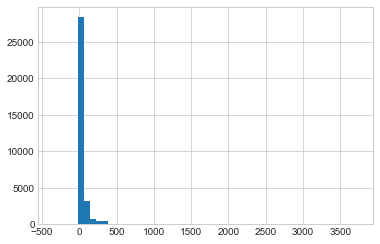

In [40]:
# Analyzing number of days between declaration and inspection

# Histogram
print(df['DATE_DIFF'].describe().round())
plt.hist(df['DATE_DIFF'], bins=50)
plt.show()

# Box plot
#plt.boxplot(df['DEC_ISSUE'])
#plt.xticks([1], df['DEC_ISSUE'], rotation='horizontal')
#plt.show()

In [19]:
#TODO: Analyze all the numerical variables

## One Variable (categorical)

Rosemont–La Petite-Patrie               4320
Villeray–Saint-Michel–Parc-Extension    4304
Mercier–Hochelaga-Maisonneuve           4036
Le Plateau-Mont-Royal                   3696
Ville-Marie                             3347
Côte-des-Neiges–Notre-Dame-de-Grâce     2909
Ahuntsic-Cartierville                   2695
Montréal-Nord                           1754
Le Sud-Ouest                            1251
Saint-Laurent                           1116
Name: BORO_NAME, dtype: int64


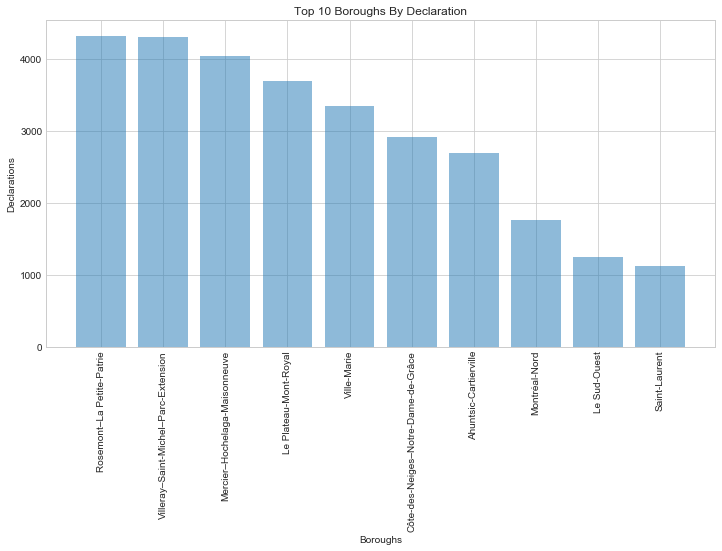

In [6]:
# Analyze by borough distribution
print(df['BORO_NAME'].value_counts().head(10))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')
plt.xlabel('Boroughs')
plt.ylabel('Declarations')

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.xticks(rotation=90)
plt.show()

In [21]:
#TODO: Analyze all the categorical variables

Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME, dtype: int64


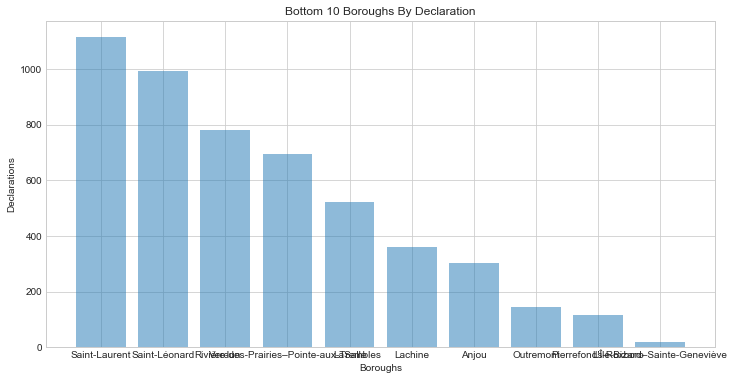

In [42]:
# Analyze borough distribution
print(df['BORO_NAME'].value_counts().tail(10))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Boroughs By Declaration')
plt.xlabel('Boroughs')
plt.ylabel('Declarations')

labels = df['BORO_NAME'].value_counts().tail(10).index
values = df['BORO_NAME'].value_counts().tail(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Sainte-Marie      1730
Crémazie          1205
Parc-Extension    1171
Maisonneuve       1150
Lorimier           964
Vieux-Rosemont     938
Est                866
Père-Marquette     800
Cartierville       793
Montagne           792
Name: HOOD_NAME, dtype: int64


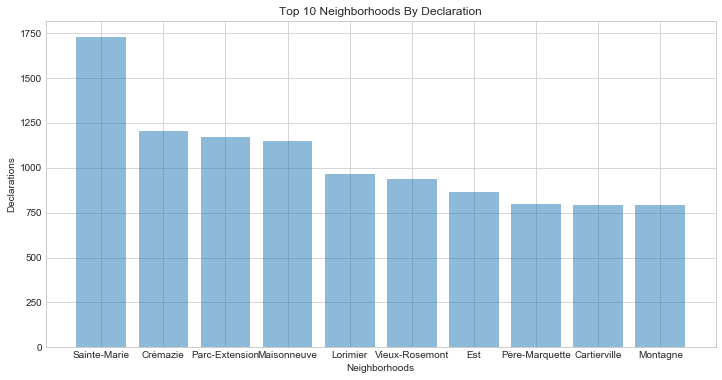

In [43]:
# Analyze Neighborhood distribution
print(df['HOOD_NAME'].value_counts().head(10))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')
plt.xlabel('Neighborhoods')
plt.ylabel('Declarations')

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

Ville-Émard                      89
Du College/Hodge                 79
Lachine-Ouest                    76
Dutrisac                         65
Guybourg                         64
Bois-Francs                      48
Rivière-des-Prairies             29
Ile-des-Soeurs                   21
Pierrefonds-Ouest                21
L'Île-Bizard–Sainte-Geneviève    18
Name: HOOD_NAME, dtype: int64


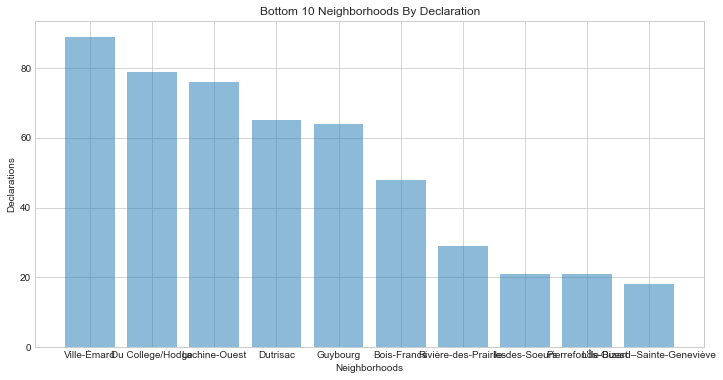

In [44]:
# Analyze Neighborhood distribution
print(df['HOOD_NAME'].value_counts().tail(10))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Neighborhoods By Declaration')
plt.xlabel('Neighborhoods')
plt.ylabel('Declarations')

labels = df['HOOD_NAME'].value_counts().tail(10).index
values = df['HOOD_NAME'].value_counts().tail(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

10    4022
9     3671
11    3379
7     3217
8     3202
12    2703
6     2552
2     2264
3     2186
5     2069
4     2069
1     2031
Name: DEC_MONTH, dtype: int64


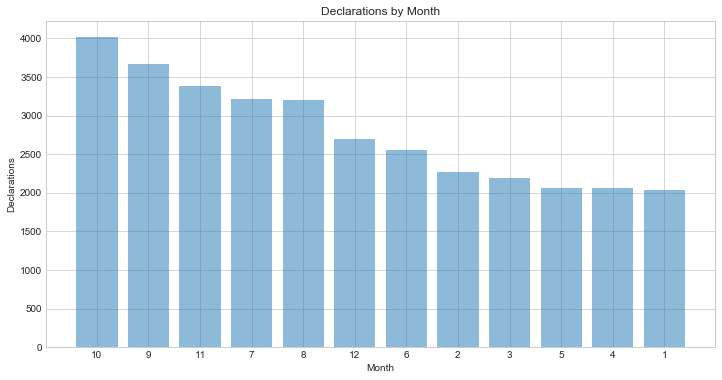

In [45]:
# Analyze Months distribution from declaration
print(df['DEC_MONTH'].value_counts().head(12))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by Month')
plt.xlabel('Month')
plt.ylabel('Declarations')

labels = df['DEC_MONTH'].value_counts().head(12).index
values = df['DEC_MONTH'].value_counts().head(12).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

299241.0, 5049383.8    264
292371.2, 5047691.7    181
295384.6, 5045734.1    151
298344.7, 5039355.2    148
290179.3, 5042045.3    139
298513.6, 5039213.5    136
296512.2, 5032054.7    116
299828.1, 5043212.2    114
296610.3, 5049394.6    107
294324.9, 5040511.5    101
296445.3, 5049181.5    100
296756.9, 5049177.3     96
Name: MTMXY, dtype: int64


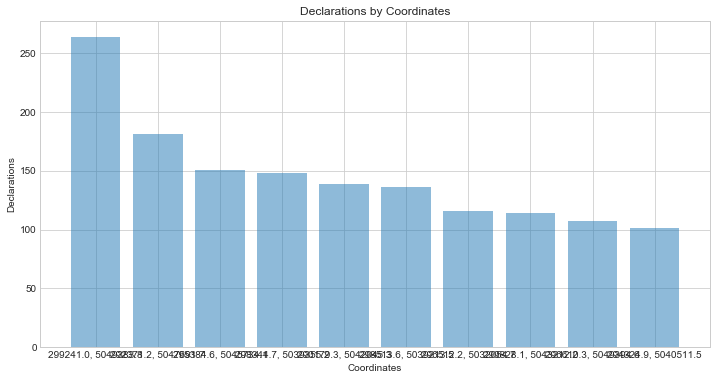

In [46]:

# Analyze Coordinates distribution from declaration
print(df['MTMXY'].value_counts().head(12))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by Coordinates')
plt.xlabel('Coordinates')
plt.ylabel('Declarations')

labels = df['MTMXY'].value_counts().head(10).index
values = df['MTMXY'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()


-73.571239, 45.584338                     264
-73.659233, 45.569024                     181
-73.620588, 45.551456                     151
-73.582592, 45.49409                      148
-73.68714399999999, 45.518173             139
-73.58043, 45.492816999999995             136
-73.60591600000001, 45.428377000000005    116
-73.563652, 45.528809                     114
-73.604952, 45.58441                      107
-73.634049, 45.504446                     101
-73.607061, 45.58249                      100
-73.60306800000001, 45.582456              96
Name: LONLAT, dtype: int64


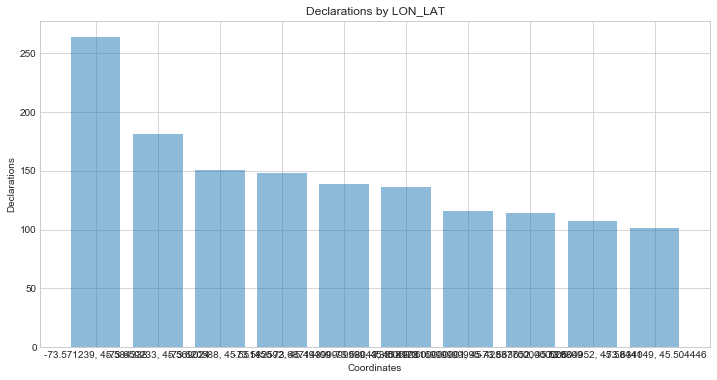

In [47]:

# Analyze Coordinates distribution from declaration
print(df['LONLAT'].value_counts().head(12))

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by LON_LAT')
plt.xlabel('Coordinates')
plt.ylabel('Declarations')

labels = df['LONLAT'].value_counts().head(10).index
values = df['LONLAT'].value_counts().head(10).values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()


## Multiple variables (Numeric x Numeric)

In [48]:
# Correlation
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DATE_DIFF,DEC_MONTH,DEC_ISSUE
NO_DECLARATION,1.00,-0.05,-0.05,-0.00,-0.05,-0.00,0.11,0.08,nan
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.03,-0.05,nan
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,-0.07,-0.00,nan
MTM8_Y,-0.00,0.01,0.22,1.00,0.22,1.00,0.01,0.02,nan
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,-0.07,-0.00,nan
LATITUDE,-0.00,0.01,0.22,1.00,0.22,1.00,0.01,0.02,nan
DATE_DIFF,0.11,-0.03,-0.07,0.01,-0.07,0.01,1.00,0.05,nan
DEC_MONTH,0.08,-0.05,-0.00,0.02,-0.00,0.02,0.05,1.00,nan
DEC_ISSUE,nan,nan,nan,nan,nan,nan,nan,nan,nan


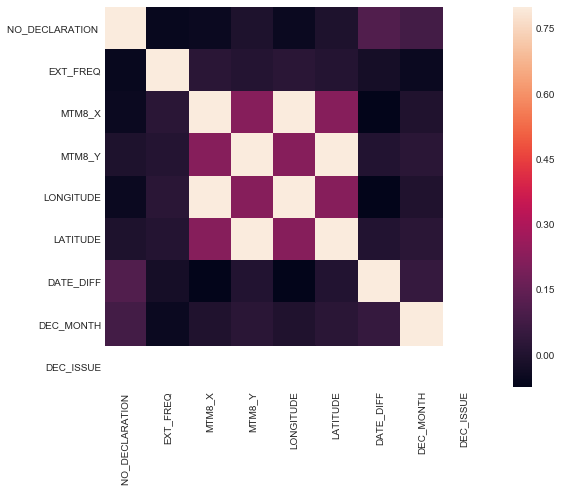

In [49]:
# heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [30]:
# Visualization : correlation between Price x SQFT

#plt.figure(figsize=(10,10))
#plt.xlabel('DATE_DIFF')
#plt.ylabel('DEC_MONTH')

#plt.plot(df['DATE_DIFF'], df['DEC_MONTH'], 'o', alpha=0.3)
#plt.show()

In [31]:
# TODO: Create a scatterplot Price x Mean Income
# TODO: What is the correlation between Price x Mean Income


## Multiple variables (Categorical x Numeric)

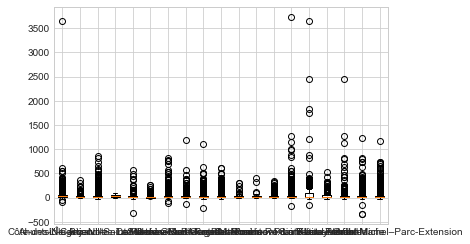

In [50]:
# Box plot to show the distribution between BOROUGHS x Number days between declaration and inspection
values = []
labels = []
for bdr in sorted(df['BORO_NAME'].unique()):
    labels.append(bdr)
    values.append(list(df[df['BORO_NAME']==bdr]['DATE_DIFF'].values))

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

## Multiple variables (Categorical x Categorical)

In [ ]:
# Count of number of houses by zipcode and bedrooms

n_bedrooms = [2,3,4]
zipcodes = df['zipcode'].unique()
r = range(len(zipcodes))

df_group = df.groupby(['zipcode', 'bedrooms'])['id'].count().reset_index()
df_group = df.pivot_table(index='zipcode', columns = 'bedrooms', values='id')
df_group = df_group[[2,3,4]]
df_group.columns = ['2BR','3BR','4BR']
df_group = df_group.sort_values(['2BR','3BR','4BR'])

raw_data = {'2BR': df_group['2BR'].values, 
            '3BR': df_group['3BR'].values, 
            '4BR': df_group['4BR'].values
           }

# From raw value to percentage
totals = [float(i+j+k) for i,j,k in zip(raw_data['2BR'], raw_data['3BR'], raw_data['4BR'])]
br2Bars = [i / j * 100 for i,j in zip(raw_data['2BR'], totals)]
br3Bars = [i / j * 100 for i,j in zip(raw_data['3BR'], totals)]
br4Bars = [i / j * 100 for i,j in zip(raw_data['4BR'], totals)]

# plot
barWidth = 0.85
names = zipcodes
plt.figure(figsize=(12,6))
# Create green Bars
plt.bar(r, br2Bars, edgecolor='white', width=barWidth, alpha=0.7, color='g', label='2BR')
# Create orange Bars
plt.bar(r, br3Bars, bottom=br2Bars, edgecolor='white', width=barWidth, alpha=0.7, color='orange', label='3BR')
# Create blue Bars
plt.bar(r, br4Bars, bottom=[i+j for i,j in zip(br2Bars, br3Bars)], edgecolor='white', width=barWidth, alpha=0.7, color='b', label='4BR')

# Limit on y-axis
plt.ylim(0,100)

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("zipcode")

plt.legend()

# Show graphic
plt.show()

## Business Perspective
"An approximate answer to the right question is worth a great deal more than a precise answer to the wrong question." John Tukey

In [ ]:
# What is the total number of sales per month?

In [ ]:
# What is the total sales ($) per month?

In [ ]:
# What is the total number of sales per day of week?

In [ ]:
# What is the average price by zip code?

In [ ]:
# Identify the zip codes with highest and lowest price per square foot

In [ ]:
# Is the grade a good indicator of price?

In [ ]:
# Is the walking score a good indicator of price?

In [ ]:
# Apply linear regression to the price

# We can use this regression test with our 4 columns.ie: DATE_DEC_FIRST, DECLARED, DATE_DIFF, EXT_FREQ

from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

columns = ['bedrooms', 'sqft_living15', 'grade', 'condition']

# Train the model using the training sets
model.fit(df[columns], df['price'])

# Print the Coefficients
print('Coefficients', np.round(model.coef_,2))
print('Interception', round(model.intercept_,2))
print('')
for i, col in enumerate(columns):
    print(col, round(model.coef_[i],1))

print('')
prediction = model.predict([[4, 3000, 10, 4]])
print('Prediction', prediction.round(1)[0])

In [ ]:
# Apply linear regression to the price considering the zipcode

from sklearn import linear_model

# Create linear regression object
model = linear_model.LinearRegression()

columns = ['bedrooms', 'sqft_living15', 'grade', 'condition']

# Train the model using the training sets
zipcode = 98000
model.fit(df[df['zipcode']==zipcode][columns], df[df['zipcode']==zipcode]['price'])

# Print the Coefficients
print('Coefficients', np.round(model.coef_,2))
print('Interception', round(model.intercept_,2))
print('')
for i, col in enumerate(columns):
    print(col, round(model.coef_[i],1))

print('')
prediction = model.predict([[4, 3000, 10, 4]])
print('Prediction', prediction.round(1)[0])